In [1]:
from numpy import array,mean

In [2]:
x=array([1,2,3,4,5])
y=array([1,3,5,7,9])

In [4]:
def lin(dx,dy):
    m=((mean(dx)*mean(dy))-mean(dx*dy))/((mean(dx)**2)-mean(dx**2))
    c=mean(dy)-m*mean(dx)
    return m,c
lin(x,y)

(2.0, -1.0)

In [5]:
m,c=lin(x,y)

In [6]:
ry=[m*i+c for i in x]

In [8]:
import matplotlib.pyplot as plt

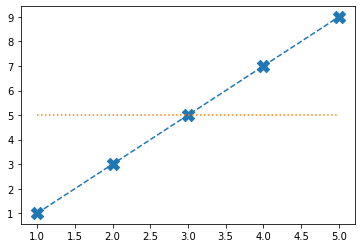

In [9]:
plt.scatter(x,y,marker='X',s=150)
plt.plot(x,ry,"--")
plt.plot(x,[mean(y) for _ in x],":")
plt.show()

In [10]:
1-(sum((ry-y)**2))/(sum((mean(y)-y)**2))

1.0

In [11]:
x=array([1,2,3,4,5,6,7,8,9,10])
y=array([2,4,6,8,10,12,14,16,18,20])

In [12]:
x1=x[:5]
x2=x[5:]
y1=y[5:]
m,c=lin(x1,y1)
lin(x1,y1),lin(x,y)

((2.0, 10.0), (2.0, 0.0))

In [13]:
for i in x2:
    print(m*i+c,i)

22.0 6
24.0 7
26.0 8
28.0 9
30.0 10


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas_datareader import data as dt
import datetime
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime
def fun(stock,test,days,lab,message):
    global f
    start = datetime.datetime(2010, 1, 1)
    end = datetime.datetime.now()
    f = dt.DataReader(stock, 'tiingo', start, end,access_key='911ee28d70118f9cea5a84d2b8f1436fa32d3116')
    f.reset_index(inplace=True)
    f.set_index('date',inplace=True)
    f=f[['adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume',]]
    no_days=int(days)
    f['newclose']=f['adjClose'].shift(-no_days)
    x=f.drop(['adjClose','newclose'],axis=1)
    y=f['newclose'].dropna()
    x1=x[:-no_days]
    x_pr=x[-no_days:]
    x_tr,x_ts,y_tr,y_ts=train_test_split(x1,y,test_size=float(test))
    alg=LinearRegression()
    alg.fit(x_tr,y_tr)
    lab.config(text=str(alg.score(x_ts,y_ts)))
    prd=alg.predict(x_pr)
    message.config(text=str(prd))
    lastday=f.iloc[-1].name
    f['forecast']=np.nan
    for i in prd:
        lastday+=datetime.timedelta(1)
        f.loc[lastday]=[np.nan for _ in range(6)]+[i]
def vis():
    %matplotlib tk
    f['adjClose'].plot()
    f['forecast'].plot()
    plt.show()

In [15]:
from tkinter import *
def gui():
    scr=Tk()
    label=Label(scr,font=('times',20,'bold'),text='stock name')
    label.grid(row=0,column=0)
    stock=StringVar()
    op=OptionMenu(scr,stock,'googl','msft')
    op.grid(row=0,column=1)
    label1=Label(scr,font=('times',20,'bold'),text='test Size')
    label1.grid(row=1,column=0)
    test=DoubleVar()
    op1=OptionMenu(scr,test,0.1,0.2,0.3)
    op1.grid(row=1,column=1)
    label2=Label(scr,font=('times',20,'bold'),text='number of days')
    label2.grid(row=2,column=0)
    e=Entry(scr,font=('times',20,'bold'))
    e.grid(row=2,column=1)
    b=Button(scr,text='evaluate',font=('times',20,'bold'),command=lambda :fun(stock.get(),test.get(),e.get(),label4,m))
    b.grid(row=3,column=0)
    b1=Button(scr,text='visualize',font=('times',20,'bold'),command=vis)
    b1.grid(row=3,column=1)
    label3=Label(scr,font=('times',20,'bold'),text='Acurracy')
    label3.grid(row=4,column=0)
    label4=Label(scr,font=('times',20,'bold'))
    label4.grid(row=4,column=1)
    m=Message(scr,font=('times',20,'bold'))
    m.grid(row=5,columnspan=7)
    scr.mainloop()

In [16]:
gui()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: the 'access_key' keyword is deprecated, use 'api_key' instead
  if sys.path[0] == '':
